In [1]:
from itertools import product, combinations
from numba import njit

In [2]:
#@njit
def basis_creator(n):
    basis = []
    L = n+1
    r_spins = (list(product([1, 0], repeat=L)))
    for i, state in enumerate(r_spins):
        valid = True
        for j in range(len(state)):
            j1p = (j+1)%L
            j0p = (j-1) if j>0 else L-1
            s0j = state[j0p]
            s1j = state[j1p]
            
            if s0j == 1 and s1j == 1 :
                valid = False
                break
        
        if valid :
            basis.append(r_spins[i])
    return basis

In [4]:
basis = basis_creator(16)

In [6]:
len(basis)

3571

In [28]:
 r_spins 

[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 0)]

In [35]:
from itertools import product

def basis_cr(n):
    basis = []
    L = n + 1  # Length of the spin chain plus one for periodic boundary conditions
    r_spins = list(product([1, 0], repeat=L))  # Generate all possible spin configurations
    
    for state in r_spins:
        # Check for the allowed configurations only
        valid = True
        for j in range(L):
            if state[j] == 1:
                # Configuration should be 101
                j1p = (j + 1) % L
                jp = (j ) 
                j0p = (j -1) if j>0 else n
                if state[j1p] == 0 and state[jp] == 1 and state[j0p] == 0:
                    continue
                elif state[j1p] == 1 and state[jp] == 0 and state[j0p] == 1:
                    continue
                elif state[j1p] == 0 and state[jp] == 0 and state[j0p] == 0:
                    continue
                elif state[j1p] == 1 and state[jp] == 0 and state[j0p] == 0:
                    continue
                elif state[j1p] == 0 and state[jp] == 0 and state[j0p] == 1:
                    continue
                else:
                    valid = False
                    break
        
        if valid :#or state.count(1) == 0:
            basis.append(list(state))  # Add valid configuration to the basis
    
    return basis


In [40]:
bases = basis_cr(3)

In [41]:
bases

[[1, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 0]]

In [42]:
from itertools import product

def basis_cr2(n):
    basis = []
    L = n + 1  # Length of the spin chain plus one for periodic boundary conditions
    r_spins = list(product([1, 0], repeat=L))  # Generate all possible spin configurations
    
    for state in r_spins:
        # Check for the allowed configurations only
        valid = True
        for j in range(L):
            if state[j] == 1:
                # Configuration should be 101
                j1p = (j + 1) % L
                jp = (j ) 
                #j0p = (j -1) if j>0 else n
                if state[j1p] == 1 and state[jp] == 1 :#and state[j0p] == 0:
                    valid = False
                    break

                else:
                    continue
        
        if valid :#or state.count(1) == 0:
            basis.append(list(state))  # Add valid configuration to the basis
    
    return basis


In [57]:
bas= basis_cr2(4)
#bas
len(bas)

11

In [56]:
bases = basis_cr(4)
#(bases)
len(bases)

11

In [106]:
import sympy as sp

In [393]:
import numpy as np
from scipy.sparse.linalg import expm, expm_multiply
from scipy.sparse import lil_matrix, identity
def h(bases, mu_omega):
    d = len(bases)
    nj = int()
    
    hmat = lil_matrix((d, d), dtype=np.float64)
    for i, state in enumerate(bases):
        L = len(state)
        for j in range(len(state)):
            n_s = state[j]
            nj += ((-1**j)*n_s) + ((1-(-1**j))/2)
            
            j1p = (j + 1) % L
            jp = (j ) 
            j0p = (j -1) if j>0 else L-1
            
            if state[j1p] == 0 and state[jp] == 1 and state[j0p] == 0:
                new_state = state.copy()
                new_state[jp] = 0
                k = bases.index(new_state)
                hmat[i,k] = 1
                
            if state[j1p] == 0 and state[jp] == 0 and state[j0p] == 0:
                new_state = state.copy()
                new_state[jp] = 1
                k = bases.index(new_state)
                
                hmat[i,k] = 1
                
        
            
        
        hmat[i,i] += mu_omega*nj

    return hmat
        
        

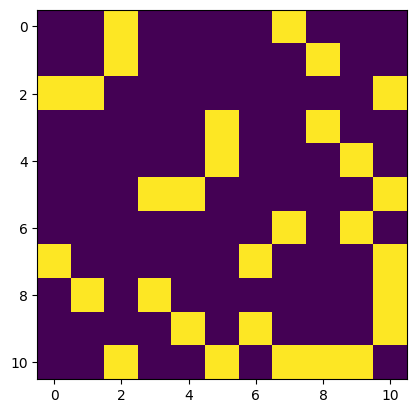

In [398]:
plt.imshow((h(bases,0)).todense())

In [247]:
bases

[[1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0]]

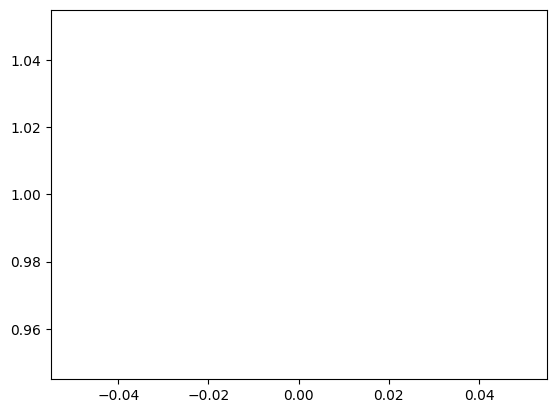

In [383]:
plt.plot(marr)

In [382]:
mu_omega = 0
t = 1
marr = []
mat_t = h(bases,mu_omega)
tlt = -1j*mat*t
ut = expm(tlt)
rho0 = identity(11)
rhot = ut * rho0
rhot_spm = sp.Matrix(np.real(rhot.todense())) 
start_state = 3
rho_start = rhot_spm[:,start_state]
nj = int()
M = int()
for i in range(len(rho_start)):
    if rho_start[i] != 0:
        for j in range(len(bases[i])):
            L = len(bases[i])
            n_s = state[j]
            nj += (1/L)*(((-1**j)*n_s) + ((1-(-1**j))/2))

        M += (rho_start[i])*nj
        marr.append(M)
print(M)
    
    
    

1.00000000000000


In [317]:
d

Matrix([
[-1.61803398874989,                 0,                  0,                  0,                 0,                 0,                0,                0,    0,                    0,   0],
[                0, -1.61803398874989,                  0,                  0,                 0,                 0,                0,                0,    0,                    0,   0],
[                0,                 0, -0.618033988749895,                  0,                 0,                 0,                0,                0,    0,                    0,   0],
[                0,                 0,                  0, -0.618033988749895,                 0,                 0,                0,                0,    0,                    0,   0],
[                0,                 0,                  0,                  0, 0.618033988749895,                 0,                0,                0,    0,                    0,   0],
[                0,                 0,                  

In [332]:
len(ma)

100

In [412]:
p

Matrix([
[   -0.444907497400089,   -0.0525990088009076,   -0.272176366443882,     -0.22663944163229,   -0.422569763251583,    -0.128489694768748,    0.443832249210105,   -0.013280931237183, -0.210818510677892,    -0.333333333333333, 0.210818510677892],
[  -0.0943462644541839,    -0.438684050940766,   0.0116184642977315,     0.441589599750713,    0.255810674855239,     0.355979294002807,    0.189355394423783,    0.422899614934122, -0.210818510677892,    -0.333333333333333, 0.210818510677892],
[    0.333277153387182,     0.303629629017399,    0.421591541709841,    -0.347796661722773,   -0.269821872958233,     0.368085903647799,    0.391331485022199,    0.253158268951701,  0.316227766016838,  -1.1559450020311e-34, 0.316227766016838],
[    0.386598299255817,    -0.218522645002976,    0.253377296313075,    -0.487867539842826,  0.00865939665075796,    -0.447496902218985,   -0.326804179503065,    0.274647267095713, -0.210818510677892,    -0.333333333333333, 0.210818510677892],
[    0.33327715

In [448]:
bases

[[1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0]]

0.00252857967908168


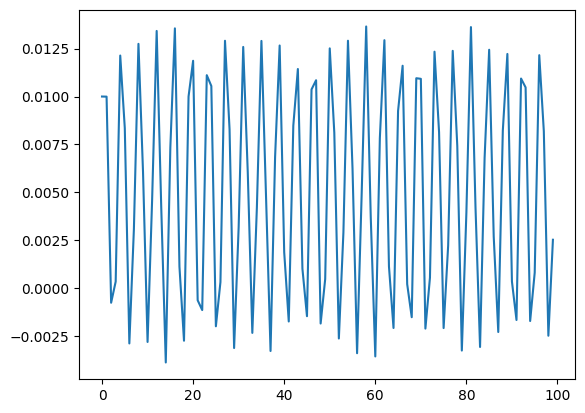

In [455]:
mu_omega = 1.68
t = [i for i in range(100)]
start_state = 10
ma= []
nj = int()
M = int()
dt = 1
mat_t = h(bases,mu_omega)
p,d = (sp.Matrix(mat_t.todense())).diagonalize()
for n in range(len(t)):
    
    
    tlt = -1j*mat_t*n
    ut = expm(tlt)
    rho0 = identity(11)
    #rho0 = (p.conjugate())*rho0*p
    rhot = ut * rho0
    rhot_spm = sp.Matrix((np.real(rhot)).todense()) 
    rho_start = rhot_spm[:,start_state]

    for i in range(len(rho_start)):
        state = bases[i]
        if rho_start[i] != 0:
            L = len(bases[i])
            for j in range(L):
            
                n_s = (-1**j)*state[j]
                nj = (n_s) + ((1-(-1**j))/2)
                M += ((rho_start[i])*nj)*(1/(L*100))
    ma.append(M)


    
print(M)    
plt.plot(ma)    

In [454]:
state

[0, 0, 0, 0, 0]

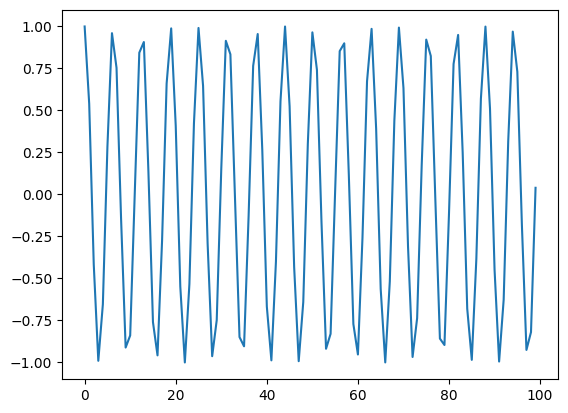

In [303]:
plt.plot(ma)

In [232]:
tstate = rhot_st[:,2]
tstate

Matrix([
[ -0.0435936077109811],
[  0.0843931468254916],
[   -0.27649846787579],
[ 0.00026869616319312],
[0.000269173346834788],
[0.000860993562123309],
[0.000108576157573318],
[   0.001000960833669],
[-0.00182148148660139],
[ 0.00134299687411904],
[ 0.00394039522433159]])

In [230]:
rhot = ut1*rho0
rhot_st = sp.Matrix(np.real(rhot.todense()))

In [231]:
sp.Matrix((np.real(at)).todense()) 

Matrix([
[                  1.0, -1.38777878078145e-16,                     0,  8.32667268468867e-17, -8.32667268468867e-17,                     0,  2.77555756156289e-17,                     0,                     0,                     0, 1.17961196366423e-16],
[-5.55111512312578e-17,                   1.0,                     0, -1.11022302462516e-16,                     0,                     0, -5.55111512312578e-17,                     0,                     0,                     0, 5.55111512312578e-17],
[                    0,                     0,                   1.0,                     0,                     0, -7.58941520739853e-17,                     0, -2.99239799605999e-17,  7.37257477290143e-17, -3.12250225675825e-17,                    0],
[-1.11022302462516e-16, -8.32667268468867e-17,                     0,                   1.0,  1.11022302462516e-16,                     0,  2.77555756156289e-17,                     0,                     0,                     0

In [229]:
tl1 = -1j*mat168
ut1 = expm(tl1)

sp.Matrix((np.real(ut1)).todense())

Matrix([
[   0.211071787010323,    0.0253869079527206,  -0.0435936077109811,   5.45379470933199e-5,   1.7015059061927e-5,  -7.45494448665656e-5, -0.00270906973660704, -0.00311367401735565, -0.000540046670447511, 0.000196067432504841,  0.000704624675974134],
[  0.0253869079527205,    -0.869331942926788,   0.0843931468254916,  0.000776589774602199,  6.33699451505075e-5,   4.75245745440985e-5,   2.3649838472296e-5, -0.00057678512520856,    0.0151234035673951, 0.000210823348314368,  -0.00149686105562734],
[ -0.0435936077109812,    0.0843931468254917,    -0.27649846787579,   0.00026869616319312, 0.000269173346834788,  0.000860993562123308, 0.000108576157573318,    0.001000960833669,   -0.0018214814866014,  0.00134299687411904,   0.00394039522433157],
[ 5.45379470933199e-5,  0.000776589774602199,  0.00026869616319312,    -0.960603317083035,   -0.024337383528959,    0.0232223862277334, -4.22141764344154e-5,  3.29452326605807e-5,     0.024034927728068,  0.00100791414520744, -0.0004373869836802

In [217]:
bases

[[1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0]]

In [389]:
mat168 = h(bases, 1.68)
sp.Matrix(mat168.todense())


Matrix([
[5.04,     0,  1.0,     0,     0,    0,     0,   1.0,     0,    0,    0],
[   0, 10.08,  1.0,     0,     0,    0,     0,     0,   1.0,    0,    0],
[ 1.0,   1.0, 16.8,     0,     0,    0,     0,     0,     0,    0,  1.0],
[   0,     0,    0, 21.84,     0,  1.0,     0,     0,   1.0,    0,    0],
[   0,     0,    0,     0, 26.88,  1.0,     0,     0,     0,  1.0,    0],
[   0,     0,    0,   1.0,   1.0, 33.6,     0,     0,     0,    0,  1.0],
[   0,     0,    0,     0,     0,    0, 38.64,   1.0,     0,  1.0,    0],
[ 1.0,     0,    0,     0,     0,    0,   1.0, 45.36,     0,    0,  1.0],
[   0,   1.0,    0,   1.0,     0,    0,     0,     0, 52.08,    0,  1.0],
[   0,     0,    0,     0,   1.0,    0,   1.0,     0,     0, 58.8,  1.0],
[   0,     0,  1.0,     0,     0,  1.0,     0,   1.0,   1.0,  1.0, 67.2]])

In [221]:
mat0 = h(bases, 0)
sp.Matrix(mat0.todense())

Matrix([
[  0,   0, 1.0,   0,   0,   0,   0, 1.0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0, 1.0,   0,   0],
[1.0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0,   0, 1.0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0,   0, 1.0,   0],
[  0,   0,   0, 1.0, 1.0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0,   0,   0,   0, 1.0,   0, 1.0,   0],
[1.0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0, 1.0],
[  0, 1.0,   0, 1.0,   0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0, 1.0,   0, 1.0,   0,   0,   0, 1.0],
[  0,   0, 1.0,   0,   0, 1.0,   0, 1.0, 1.0, 1.0,   0]])

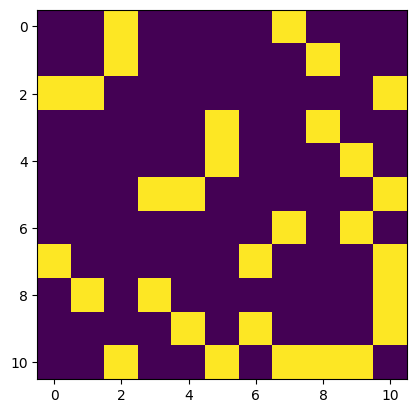

In [386]:
import matplotlib.pyplot as plt
plt.imshow(mat0.todense())

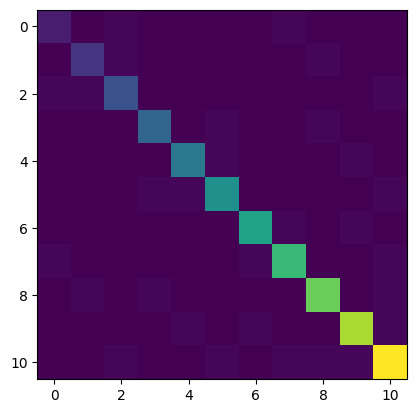

In [384]:
plt.imshow(mat168.todense())

In [215]:
def is_hermitian(matrix):
    # Check if the matrix is equal to its conjugate transpose
    return (matrix != matrix.getH()).nnz == 0

# Check if the matrix H is Hermitian
hermitian_check = is_hermitian(mat168)
print(f"The matrix is Hermitian: {hermitian_check}")

The matrix is Hermitian: True
